<a href="https://colab.research.google.com/github/sarahaptumich/capstone/blob/Sihyun/data_exploration_judges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/School/MADS/SIADS 699 : Capstone/Team

/content/drive/MyDrive/School/MADS/SIADS 699 : Capstone/Team


In [ ]:
#!git pull   #check that git us up to date
#!git checkout -b shaptonstall # create a new branch

#!git push origin shaptonstall #commit changes to my branch

In [ ]:
# to commit to github
#!git status # check untracked files
#!git add {filename} # add the files
#!git config --global user.email "sarahapt@umich.edu"
# !git commit

In [ ]:
pip install factor-analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 995.8 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=aaaacbfad53baa3c7ee6d9a3f82b5252fb3d29ea0d0738a23f1a7e0edc8bec90
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor-analyzer


In [ ]:
pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 11.3 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659680 sha256=3f314ace1e97505c0f4a25e2ba2e402ad6255ce9bea4614fd9daa2038ff253e7
  Stored in directory: /root/.cache/pip/wheels/53/ec/0d/0b294c02d8c4e9e80afea58839f2c1b4706770594bc99ec045
Successfully built semopy


Import libraries

In [ ]:
import pandas as pd
import numpy as np
import re
from datetime import datetime, timedelta
from sklearn.decomposition import PCA, KernelPCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from factor_analyzer import Rotator
from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser)
from semopy import Model
from semopy import Optimizer
from semopy.inspector import inspect
from semopy import gather_statistics
import semopy
from semopy import ModelMeans

In [ ]:
!ls

'[2023.07.08] Cypher Minds Data.xlsx'
 AIST++.pdf
 groovenet-ml4c-2017.pdf
 Judges.gsheet
'Settle it in the Cypher - Sports Analytics and Data Technology for Competitive Breaking.docx'
'Trivium Data Analysis.xlsx'
 Webscraping.xlsx


In [ ]:
# Load all sheets into a dictionary of DataFrames
webscraping = pd.read_excel('Webscraping.xlsx', sheet_name=None)



In [ ]:
webscraping.keys()
# webscraping['Events and8']

dict_keys(['Events and8', 'Events WDSF', 'Battles Trivium', 'Battles and8 Threefold', 'Battles and8 Single Slider', 'Battles and8 Round by Round', 'Battles and8 Traditional', 'Research Questions', 'Notes', 'Notes Columns'])

Events details

In [ ]:
eventsAnd8=webscraping['Events and8'][1:].copy()
new_header= eventsAnd8.iloc[0]
eventsAnd8=eventsAnd8.drop(1)
eventsAnd8.columns = new_header
eventsAnd8.rename(columns={'Name':'Event'}, inplace=True)
eventsAnd8.drop_duplicates(subset=['Event'], inplace=True)

eventsWDSF = webscraping['Events WDSF'][1:].copy()
new_header = eventsWDSF.iloc[0]
eventsWDSF = eventsWDSF.drop(1)
eventsWDSF.columns = new_header
eventsWDSF.rename(columns={'Name': 'Event'}, inplace=True)
eventsWDSF.drop_duplicates(subset=['Event'], inplace=True)

combined_events = pd.concat([eventsAnd8, eventsWDSF], ignore_index=True)


In [ ]:
combined_events

1,Date,Event,Category,Stage,Link,Format,Scraped
0,2023-07-16 00:00:00,Campionato Italiano di Categoria Breaking FIDS,1vs1 BBoy 12-15 C,32 @ Preselection,https://and8.dance/en/stats/reports/4459/1790/...,NaN,no
1,2023-07-08 00:00:00,German Breaking Championship 2023,1vs1 B-Girls,21 @ Preselection,https://and8.dance/en/stats/reports/4437/1726/...,NaN,no
2,2023-06-30 00:00:00,Munich Mash Streetdance Battles,2vs2 Breaking,Top 8 KnockOut,https://and8.dance/en/stats/reports/4431/1778/r/,NaN,no
3,2023-06-25 00:00:00,JDSF Breaking Block Battle Series 2023 – Kansai,1vs1 Junior B-Girl,5 @ Preselection,https://and8.dance/en/stats/reports/4444/1728/...,NaN,no
4,2023-06-24 00:00:00,The Movement ARENA 2023,1vs1 B-Girl (SBL),5 @ Preselection,https://and8.dance/en/stats/reports/4281/1560/...,NaN,no
...,...,...,...,...,...,...,...
266,2018.10.07,WDSF Youth Olympic Games - Buenos Aires,NaN,NaN,https://worlddancesport.org/Event/Competition/...,NaN,and8
267,2018.05.20,WDSF World Championship - Kawasaki,NaN,NaN,https://worlddancesport.org/Event/Competition/...,NaN,and8
268,2017.12.02,WDSF Asian Qualifier - Taipei,NaN,NaN,https://worlddancesport.org/Event/Competition/...,NaN,and8
269,2017.10.22,WDSF European Qualifier - Essen,NaN,NaN,https://worlddancesport.org/Event/Competition/...,NaN,and8


Threefold Battles

In [ ]:
#threefold battles
threefold = webscraping['Battles and8 Threefold']
threefold.rename(columns={'Unnamed: 0':'Event', 'Unnamed: 1': 'Category'}, inplace=True)
threefold[['Event', 'Category']] = threefold[['Event', 'Category']].fillna(method='ffill')
threefold.head(2)

,Event,Category,breaker 1,breaker 2,winner,battle rounds,number of judges,breaker 1 round wins,breaker 2 round wins,breaker 1 vote count,...,r3j7arti,r3j7inte,r3j8over,r3j8phys,r3j8arti,r3j8inte,r3j9over,r3j9phys,r3j9arti,r3j9inte
0,Campionato Italiano di Categoria Breaking FIDS...,1vs1 BBoy 12-15 C Top 16 KnockOut,Baruzzo,Elpablix,Baruzzo,3,3,2,1,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Campionato Italiano di Categoria Breaking FIDS...,1vs1 BBoy 12-15 C Top 16 KnockOut,Yoga,Faby,Faby,2,3,0,2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.merge(threefold, combined_events[['Date', 'Event', 'Format']], on='Event')['Format'].unique()


array([nan], dtype=object)

Trivium Battles

In [ ]:
test_trivium=webscraping['Battles Trivium']
test_trivium.rename(columns={'Unnamed: 0':'Event', 'Unnamed: 1': 'Category'}, inplace=True)
test_trivium[['Event', 'Category']]= test_trivium[['Event', 'Category']].fillna(method='ffill') # fill values by Event's name

In [ ]:
test_trivium.columns

Index(['Event', 'Category', 'breaker 1 (red)', 'breaker 2 (blue)', 'winner',
       'battle rounds', 'number of judges', 'breaker 1 round wins',
       'breaker 2 round wins', 'breaker 1 vote count',
       ...
       'r5j8but2', 'r5j9over', 'r5j9tech', 'r5j9vari', 'r5j9perf', 'r5j9musi',
       'r5j9crea', 'r5j9pers', 'r5j9but1', 'r5j9but2'],
      dtype='object', length=425)

In [ ]:
test_trivium

,Event,Category,breaker 1 (red),breaker 2 (blue),winner,battle rounds,number of judges,breaker 1 round wins,breaker 2 round wins,breaker 1 vote count,...,r5j8but2,r5j9over,r5j9tech,r5j9vari,r5j9perf,r5j9musi,r5j9crea,r5j9pers,r5j9but1,r5j9but2
0,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Ami,671,671,3,9,1,2,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Sunny,Anti,Anti,3,9,1,2,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Anti,671,671,3,9,0,3,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Ami,Sunny,Ami,3,9,3,0,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,671,Ayumi,671,2,9,2,0,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,Stiv,Rerunn,Rerunn,2,5,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1522,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,Piccolo,Rerunn,Rerunn,2,5,0,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1523,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,Piccolo,D-Matt,D-Matt,2,5,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1524,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,Stiv,D-Matt,D-Matt,2,5,0,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Create Dataframe -'Event', 'Category', 'Round number','Name', 'Overall', 'Technique', 'Variety', 'Performance', 'Musicality', 'Creativity', 'Personality'

Dictionary



*   **Event** = name of event (string)
*   **Category** = name of round (string)
*   **Round Number** = the number of each round (r1 means the first round for battle)
*   **Name** = name of judge (string)
*   **Overall** = Sum of judge scores (float)
*   **Technique** = judge scores for techique (float)
*   **Variety** = judge scores for variety (float)
*   **Performance** = judge scores for performance (float)
*   **musicalirty** = judge scores for musicality (float)
*   **Creativity** = judge scores for creativity (float)
*   **Personality** = judge scores for personality (float)





In [ ]:
columns = ['Event', 'Category', 'Round Number','Name', 'Overall', 'Technique', 'Variety', 'Performance', 'Musicality', 'Creativity', 'Personality']
judge_df = pd.DataFrame(columns=columns)

In [ ]:
judge_df

,Event,Category,Round Number,Name,Overall,Technique,Variety,Performance,Musicality,Creativity,Personality


Group by Event

In [ ]:
event_lst = list(test_trivium['Event'].unique())

index_num = 0
for event in event_lst:
  temp_lst = [] # empty list
  temp_df = test_trivium[test_trivium['Event']==event] # Take dataframe by each event

  category_lst = temp_df['Category'].unique()
  #print(category_lst)

  for category in category_lst:
    cat_temp_df = temp_df[temp_df['Category']==category] # Take dataframe by category in each event
    # print(cat_temp_df['battle rounds'].unique())
    # print('')
    num_judges = cat_temp_df['number of judges'].iloc[0] # number of judges
    judges_lst = list(cat_temp_df.filter(like="judge ").iloc[0, :num_judges]) # Judges list

    num_round = cat_temp_df['battle rounds'].iloc[0] # number of round

    for i in range(num_round):

      for j in range(num_judges):
        temp_lst.append(event)
        temp_lst.append(category)
        round = "r"+str(i+1) # Round number
        temp_lst.append(round)
        temp_lst.append(judges_lst[j])
        # print(temp_lst+list(cat_temp_df.filter(like="r"+str(i+1)).iloc[0, 0+9*j:7+9*j]))
        judge_df.loc[index_num] = temp_lst+list(cat_temp_df.filter(like=round).iloc[0, 0+9*j:7+9*j])
        index_num = index_num + 1

        temp_lst = [] # reset the list

#temp_df



In [ ]:
judge_df

,Event,Category,Round Number,Name,Overall,Technique,Variety,Performance,Musicality,Creativity,Personality
0,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,r1,Kujo,14.93,6.2,1.47,6.4,-3.07,2.2,1.73
1,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,r1,Lazylegz,-10.67,0.0,-1.33,-4.0,0.00,-4.0,-1.33
2,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,r1,Valentine,-0.40,0.0,0.00,-2.0,1.60,0.0,0.00
3,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,r1,Spin,6.40,3.2,0.00,3.2,0.00,0.0,0.00
4,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,r1,Octopus,-4.47,4.6,-1.87,-3.0,-1.60,-2.6,0.00
...,...,...,...,...,...,...,...,...,...,...,...
2398,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,r2,Jeskilz,-4.93,-2.0,0.00,-2.0,-0.93,0.0,0.00
2399,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,r2,Moy,4.00,2.0,0.00,2.0,0.00,0.0,0.00
2400,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,r2,Narumi,-5.67,0.0,0.00,-1.0,-1.73,-0.8,-2.13
2401,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,r2,Renegade,2.00,0.0,0.00,2.0,0.00,0.0,0.00


In [ ]:
judge_df

,Event,Category,Name,Overall,Technique,Variety,Performance,Musicality,Creativity,Personality
0,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,Hi,18.33,6.0,2.00,8.0,-1.20,2.2,1.33
1,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Lazylegz,-2.33,3.0,0.67,-3.0,0.67,-3.0,-0.67
2,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Valentine,4.93,1.6,0.00,2.0,0.00,0.0,1.33
3,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Spin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Octopus,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Judge Profiles**


---
What is each judge's mean, median, range, standard deviation of scores submitted?



In [ ]:
judge_df.columns

Index(['Event', 'Category', 'Round Number', 'Name', 'Overall', 'Technique',
       'Variety', 'Performance', 'Musicality', 'Creativity', 'Personality'],
      dtype='object')

In [ ]:
events_lst = list(judge_df['Event'].unique())
cols1 = ['Name', 'Overall', 'Technique', 'Variety', 'Performance', 'Musicality', 'Creativity', 'Personality']

for event in events_lst:
  # for only submitted
  event_temp_df = judge_df[judge_df['Event']==event]
  event_temp_df = event_temp_df[cols1]

  print("The name of event : ", event)
  print('')
  print(event_temp_df.groupby('Name').agg(['median', 'mean', 'std']).reset_index())


The name of event :  WDSF BfG World Series - Kitakyushu 2023 - Japan

        Name Overall                      Technique                      \
              median      mean        std    median      mean       std   
0        Aya  -1.335 -2.130000  11.888512      -1.2 -0.377778  3.150267   
1  Katsu One   2.230  1.707000   5.721070       1.5  1.220000  2.134271   
2        Kim   2.635  2.441875   2.597771       1.7  1.325000  1.427118   
3       Kujo   6.235  6.141250   7.566944       2.7  2.412500  2.992853   
4   Lazylegz   0.135 -1.432778   4.903473       0.0  0.677778  2.704366   
5        Max  -3.000 -1.345556   6.695265       0.0 -0.155556  2.470109   
6    Octopus  -2.300 -1.848889   3.682467       2.0  0.966667  2.514195   
7       Rush  -1.400 -1.326667   6.025203      -2.0 -1.655556  1.675857   
8       Spin   5.035  0.866875   7.503033       0.0  0.500000  2.052641   
9  Valentine   4.365  3.711250   5.643896       1.5  1.400000  1.731281   

  Variety                    

In [ ]:
# Want to show one event to be clearer

event = events_lst[0]

event_temp_df = judge_df[judge_df['Event']==event]
event_temp_df = event_temp_df[cols1]

print("The name of event : ", event)
print('')
event_temp_df.groupby('Name').agg(['median', 'mean', 'std']).reset_index()

The name of event :  WDSF BfG World Series - Kitakyushu 2023 - Japan



Name Overall                      Technique                      \
              median      mean        std    median      mean       std   
0        Aya  -1.335 -2.130000  11.888512      -1.2 -0.377778  3.150267   
1  Katsu One   2.230  1.707000   5.721070       1.5  1.220000  2.134271   
2        Kim   2.635  2.441875   2.597771       1.7  1.325000  1.427118   
3       Kujo   6.235  6.141250   7.566944       2.7  2.412500  2.992853   
4   Lazylegz   0.135 -1.432778   4.903473       0.0  0.677778  2.704366   
5        Max  -3.000 -1.345556   6.695265       0.0 -0.155556  2.470109   
6    Octopus  -2.300 -1.848889   3.682467       2.0  0.966667  2.514195   
7       Rush  -1.400 -1.326667   6.025203      -2.0 -1.655556  1.675857   
8       Spin   5.035  0.866875   7.503033       0.0  0.500000  2.052641   
9  Valentine   4.365  3.711250   5.643896       1.5  1.400000  1.731281   

  Variety                      ... Performance Musicality                      \
   median      mean       std  ...         std     median      mean       std   
0  -1.600 -0.785556  2.021607  ...    3.928927      1.400  0.510556  2.356464   
1   0.065  0.052000  1.337832  ...    1.812181      0.200  0.081000  0.921043   
2   0.000 -0.025625  0.908471  ...    1.387564      0.000  0.508750  0.971328   
3   0.000  0.525625  1.416098  ...    3.162040      0.800  0.390625  1.808467   
4   0.000  0.060000  0.654604  ...    2.147745      0.000  0.044444  0.891002   
5  -0.930 -0.414444  1.909439  ...    2.362009      0.265  0.445556  0.928618   
6  -1.000 -0.458889  1.507939  ...    2.257334      1.730  0.985000  1.651905   
7   0.000  0.088889  0.274781  ...    2.631459      0.000  0.421111  1.210089   
8   0.000  0.025000  1.884799  ...    2.386874      0.000  0.250000  1.187316   
9   0.000  0.033125  0.713272  ...    2.473190      0.000  0.100000  0.749124   

  Creativity                     Personality                      
      median      mean       std      median      mean       std  
0       -3.6 -2.755556  2.797104      -0.665 -0.287778  2.355825  
1        0.6  0.520000  2.207462      -1.000 -0.346000  1.178249  
2        0.0 -0.025000  1.340398       0.000 -0.141875  0.690625  
3       -0.7 -0.525000  3.328163       1.200  0.875000  1.200739  
4        0.0 -1.088889  2.665882       0.000 -0.636667  1.020467  
5       -0.2 -0.544444  1.474179       0.000  0.081667  0.540732  
6       -3.2 -2.188889  1.925033       0.000  0.392778  0.790300  
7       -0.7 -0.400000  2.212265       0.000  0.228889  1.155656  
8        0.0 -0.387500  2.140989       0.000  0.116875  0.467500  
9        0.0  0.387500  2.057142       0.000  0.415625  0.682075  

[10 rows x 22 columns]

In [ ]:
# event_temp_df['Hue']event_temp_df['Overall']>

event_temp_df['Hue'] = event_temp_df['Overall'].apply(
    lambda x: (x < 0 and 'neg') or (x >=0 and 'pos'))

**Create a grouped boxplot**:

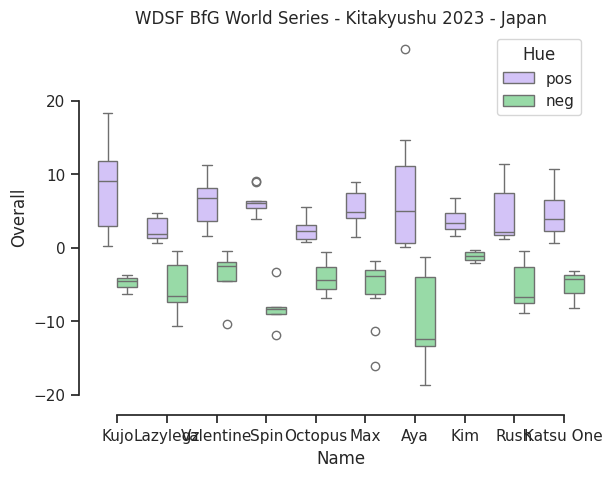

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
# join_st_qt_by_id

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Name", y="Overall",
             hue="Hue", palette=["m", "g"],
            data=event_temp_df).set_title(event)
sns.despine(offset=10, trim=True)

In [ ]:
trivium=webscraping['Battles Trivium']
trivium.rename(columns={'Unnamed: 0':'Event', 'Unnamed: 1': 'Category'}, inplace=True)
trivium[['Event', 'Category']]= trivium[['Event', 'Category']].fillna(method='ffill')


In [ ]:
trivium_columns=list(trivium.columns)
exclude=['judge 1 name ', 'judge 2 name', 'judge 3 name', 'judge 4 name', 'judge 5 name', 'judge 6 name ', 'judge 7 name', 'judge 8 name', 'judge 9 name'  ]
trivium_columns= [x for x in trivium_columns if x not in exclude]
trivium=trivium[trivium_columns]
trivium['BattleID']= trivium.index

<ipython-input-33-a75688204c39>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trivium['BattleID']= trivium.index


In [ ]:
trivium.shape

(1526, 417)

In [ ]:
trivium

,Event,Category,breaker 1 (red),breaker 2 (blue),winner,battle rounds,number of judges,breaker 1 round wins,breaker 2 round wins,breaker 1 vote count,...,r5j9over,r5j9tech,r5j9vari,r5j9perf,r5j9musi,r5j9crea,r5j9pers,r5j9but1,r5j9but2,BattleID
0,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Ami,671,671,3,9,1,2,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Sunny,Anti,Anti,3,9,1,2,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Anti,671,671,3,9,0,3,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Ami,Sunny,Ami,3,9,3,0,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,671,Ayumi,671,2,9,2,0,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,Stiv,Rerunn,Rerunn,2,5,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1521
1522,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,Piccolo,Rerunn,Rerunn,2,5,0,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1522
1523,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,Piccolo,D-Matt,D-Matt,2,5,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1523
1524,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,Stiv,D-Matt,D-Matt,2,5,0,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1524


In [ ]:
trivium['Event'].unique()

array(['WDSF BfG World Series - Kitakyushu 2023 - Japan',
       'WDSF European Breaking Championships 2022 - Manchester',
       'WDSF World Championship 2022 - Seoul',
       'The IWGA World Games 2022',
       'FISE Montpellier 2022 - WDSF Breaking for Gold World Series',
       'WDSF World Championship 2021 - Paris',
       'WDSF European Breaking Championships 2021 - Sochi',
       'World Urban Games 2019', '2019 JDSF',
       'WDSF World Breaking Championship 2019 - Nanjing',
       'FISE Hiroshima 2019', 'BAYOG 2018',
       'World Youth Breaking Championships 2018',
       'Japan Break Dance Championships 2018',
       'YOG Continental Qualifier 2017 Asia & Oceania',
       'YOG Continental Qualifier 2017 Europe', '2017 BreakSM',
       'YOG Continental Qualifier 2017 USA', 'BOTY Central Europe 2017',
       'WDSF Pan American Qualifier 2017 - Philadelphia'], dtype=object)

In [ ]:
trivium[trivium['Event']=='WDSF BfG World Series - Kitakyushu 2023 - Japan']

,Event,Category,breaker 1 (red),breaker 2 (blue),winner,battle rounds,number of judges,breaker 1 round wins,breaker 2 round wins,breaker 1 vote count,...,r5j9over,r5j9tech,r5j9vari,r5j9perf,r5j9musi,r5j9crea,r5j9pers,r5j9but1,r5j9but2,BattleID
0,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Ami,671,671,3,9,1,2,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Sunny,Anti,Anti,3,9,1,2,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Anti,671,671,3,9,0,3,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,Ami,Sunny,Ami,3,9,3,0,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,671,Ayumi,671,2,9,2,0,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Boys Top 64 PreQualifier,Tornado,Shigekix,Shigekix,2,5,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123
124,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Boys Top 64 PreQualifier,Kid Karam,Double D,Kid Karam,2,5,2,0,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124
125,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Boys Top 64 PreQualifier,Kuzya,Kalmius,Kuzya,2,5,2,0,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125
126,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Boys Top 64 PreQualifier,Dux-M,Phil Wizard,Phil Wizard,2,5,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126


In [ ]:
category_sums_blue = {
    "Creativity": trivium.filter(like="crea").sum(axis=1),
    "Musicality": trivium.filter(like="musi").sum(axis=1),
    "Performance": trivium.filter(like="perf").sum(axis=1),
    "Personality": trivium.filter(like="pers").sum(axis=1),
    "Technique": trivium.filter(like="tech").sum(axis=1),
    "Variety": trivium.filter(like="vari").sum(axis=1),
    "Overall":  trivium.filter(like="over").sum(axis=1)
}

category_sums_red = {
    "Creativity": trivium.filter(like="crea").sum(axis=1)*-1,
    "Musicality": trivium.filter(like="musi").sum(axis=1)*-1,
    "Performance": trivium.filter(like="perf").sum(axis=1)*-1,
    "Personality": trivium.filter(like="pers").sum(axis=1)*-1,
    "Technique": trivium.filter(like="tech").sum(axis=1)*-1,
    "Variety": trivium.filter(like="vari").sum(axis=1)*-1,
    "Overall":  trivium.filter(like="over").sum(axis=1)*-1
}

In [ ]:
type(category_sums_blue)

dict

In [ ]:
trivium.filter(like="r1").shape

(1526, 81)

In [ ]:
scorecardBlue=pd.DataFrame({
    "Event": trivium['Event'],
    'Category': trivium['Category'],
    "BattleID": trivium["BattleID"],
    "Side": "BLUE",
    "Breaker": trivium["breaker 2 (blue)"],
        **category_sums_blue,
})

scorecardRed=pd.DataFrame({
    "Event": trivium['Event'],
    'Category': trivium['Category'],
    "BattleID": trivium["BattleID"],
    "Side": "RED",
    "Breaker": trivium["breaker 1 (red)"],
     **category_sums_red,
})

In [ ]:
scorecard = pd.concat([scorecardBlue, scorecardRed], ignore_index=True)
scorecard['Score Type']="trivium"
scorecard.shape

(3052, 13)

In [ ]:
scorecard

,Event,Category,BattleID,Side,Breaker,Creativity,Musicality,Performance,Personality,Technique,Variety,Overall,Score Type
0,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,0,BLUE,671,-19.6,0.80,15.6,3.85,54.6,-7.07,48.18,trivium
1,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,1,BLUE,Anti,2.4,9.74,27.2,11.21,39.8,7.21,97.52,trivium
2,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,2,BLUE,671,-12.4,-1.45,24.0,2.39,50.4,14.15,77.06,trivium
3,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,3,BLUE,Sunny,-1.8,-13.07,-37.0,2.95,-20.6,-18.66,-88.17,trivium
4,WDSF BfG World Series - Kitakyushu 2023 - Japan,B-Girls Top 8 Knockout,4,BLUE,Ayumi,32.2,12.54,-20.8,0.40,-34.2,10.27,0.39,trivium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,1521,RED,Stiv,-10.6,-6.27,-16.6,-5.48,-16.2,-2.67,-57.79,trivium
3048,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,1522,RED,Piccolo,-8.8,0.67,-16.4,-2.67,-9.2,-0.00,-36.40,trivium
3049,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,1523,RED,Piccolo,-21.2,-1.73,-20.4,-12.14,-1.0,-2.14,-58.60,trivium
3050,WDSF Pan American Qualifier 2017 - Philadelphia,B-Boys Top 16 Round Robin Group A,1524,RED,Stiv,-16.4,-9.06,-13.2,-5.88,-12.0,-5.20,-61.73,trivium


In [ ]:
len(scorecard['Breaker'].unique())

508

In [ ]:
# scorecard[scorecard['Breaker']=="Ami"].mean(), scorecard[scorecard['Breaker']=="Ami"].count()

In [ ]:
# scorecard[scorecard['Breaker']==671].mean(), scorecard[scorecard['Breaker']==671].count()

In [ ]:

scorecard.shape

(3052, 13)

In [ ]:
scorecard=pd.merge(scorecard, eventsAnd8[['Date', 'Event']], on='Event', how='left')
# today = scorecard['Date'].max()
# total_days = (today - scorecard['Date'].min()).days + 1  # Get the total number of days dynamically
# scorecard['Weight'] = ((today - scorecard['Date']).dt.days / total_days) * 100
# scorecard['Weight'] = 100 - scorecard['Weight']  # Reverse the weights so that newer dates have higher weights

Trivium PCA

In [ ]:
# triviumFloat=
triviumScore=scorecardBlue[['Creativity', 'Musicality', 'Performance', 'Personality', 'Technique', 'Variety']]

In [ ]:
#imputer also get feature name for plotting later
names=triviumScore.columns
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
triviumNorm = imputer.fit_transform(triviumScore)
features=imputer.get_feature_names_out(input_features= names)


#normalize float columns
triviumNorm= StandardScaler().fit(triviumNorm).transform(triviumNorm)


In [ ]:
#set PCA
pca = PCA(n_components=3, random_state=0).fit(triviumNorm)
X_pca = pca.transform(triviumNorm)
X_pca.shape, triviumNorm.shape

((1526, 3), (1526, 6))

In [ ]:
features

array(['Creativity', 'Musicality', 'Performance', 'Personality',
       'Technique', 'Variety'], dtype=object)

In [ ]:
loadings_abs = np.abs(pca.components_)
pcs = ['PC1', 'PC2', 'PC3']

# Create DataFrame
pca_loadings = pd.DataFrame(loadings_abs.T, columns=pcs, index=features)

# pca_loadings.T.plot.bar(figsize=(10, 20), subplots=True)

In [ ]:
print( " factor Analysis accum variance: ",np.cumsum(pca.explained_variance_ratio_)[2])

 factor Analysis accum variance:  0.8822364614685656


In [ ]:
pca_loadings.style.background_gradient()

,PC1,PC2,PC3
Creativity,0.362888,0.143561,0.713032
Musicality,0.403575,0.450374,0.269483
Performance,0.469467,0.239068,0.327888
Personality,0.409212,0.452774,0.295638
Technique,0.350112,0.704047,0.190013
Variety,0.441596,0.136793,0.433527


**Factor Analysis.**
Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [ ]:
kmo_all,kmo_model=calculate_kmo(triviumNorm)
kmo_model

0.6828153227522676

In [ ]:
# perform factor analysis
fa = FactorAnalyzer(3, rotation=None)
fa.fit(triviumNorm)
X_transformed = fa.fit_transform(triviumNorm)

In [ ]:
print( " factor Analysis accum variance: ",fa.get_factor_variance()[2][-1], fa.get_params())

 factor Analysis accum variance:  0.7885636265232234 {'bounds': (0.005, 1), 'impute': 'median', 'is_corr_matrix': False, 'method': 'minres', 'n_factors': 3, 'rotation': None, 'rotation_kwargs': {}, 'svd_method': 'randomized', 'use_smc': True}


In [ ]:
faLoadings=np.abs(fa.loadings_)
fa = ['Factor1', 'Factor2', 'Factor3']

# Create DataFrame
fa_loadings = pd.DataFrame(faLoadings, columns=pcs, index=features)

# fa_loadings.T.plot.bar(figsize=(10, 20), subplots=True)


In [ ]:
fa_loadings.style.background_gradient()

,PC1,PC2,PC3
Creativity,0.584749,0.144549,0.356931
Musicality,0.669645,0.352689,0.148181
Performance,0.850926,0.149023,0.278467
Personality,0.728653,0.465250,0.282656
Technique,0.682145,0.707579,0.173523
Variety,0.840725,0.059744,0.537386


In [ ]:
pca_loadings.style.background_gradient()

,PC1,PC2,PC3
Creativity,0.362888,0.143561,0.713032
Musicality,0.403575,0.450374,0.269483
Performance,0.469467,0.239068,0.327888
Personality,0.409212,0.452774,0.295638
Technique,0.350112,0.704047,0.190013
Variety,0.441596,0.136793,0.433527


In [ ]:
normdf = pd.DataFrame(triviumNorm, columns=features)
normdf

,Creativity,Musicality,Performance,Personality,Technique,Variety
0,-1.516892,-0.136318,0.560938,0.313784,2.168559,-1.087127
1,0.104730,0.941751,1.159945,1.219928,1.537056,0.823927
2,-0.986180,-0.407644,0.994701,0.134033,1.989348,1.752689
3,-0.204852,-1.808894,-2.155249,0.202978,-1.040159,-2.638185
4,2.301292,1.279402,-1.318704,-0.110971,-1.620459,1.233439
...,...,...,...,...,...,...
1521,0.709153,0.523306,0.612576,0.514465,0.530065,0.216351
1522,0.576475,-0.313585,0.602249,0.168505,0.231381,-0.140968
1523,1.490480,-0.024170,0.808803,1.334427,-0.118506,0.145423
1524,1.136672,0.859751,0.437005,0.563712,0.350854,0.554934


In [ ]:
model_dict = {"Physical": ['Technique', 'Variety'], "Artistic": ['Creativity', 'Personality'], "Interpretive": ['Performance', 'Musicality']}


model_spec = ModelSpecificationParser.parse_model_specification_from_dict(normdf, model_dict)

cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=False)


In [ ]:
cfa.fit(normdf.values)

cfa.loadings_

array([[0.46116327, 0.        , 0.        ],
       [0.79510733, 0.        , 0.        ],
       [0.        , 0.98885383, 0.        ],
       [0.        , 0.63190673, 0.        ],
       [0.        , 0.        , 0.8877747 ],
       [0.        , 0.        , 0.5921204 ]])

In [ ]:
model_spec = '''Physical=~ Technique + Variety
Artistic =~ Creativity + Personality
Interpretive =~ Performance + Musicality
'''

In [ ]:
modelCFA= Model(model_spec)


In [ ]:
modelCFA.fit(normdf)

SolverResult(fun=1.0002738219571623, success=True, n_it=34, x=array([0.70333331, 2.20873099, 0.7049806 , 0.18421626, 0.30858884,
       0.13451218, 0.81585685, 0.79908718, 0.60280773, 0.20108571,
       0.10155843, 0.74745609, 0.70211414, 0.25253753, 0.63024941]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

In [ ]:
modelCFA.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Technique,~,Physical,1.000000,-,-,-
1,Variety,~,Physical,0.703333,0.029187,24.097385,0.0
2,Creativity,~,Artistic,1.000000,-,-,-
3,Personality,~,Artistic,2.208731,0.152256,14.506704,0.0
4,Performance,~,Interpretive,1.000000,-,-,-
5,Musicality,~,Interpretive,0.704981,0.024745,28.489786,0.0
6,Artistic,~~,Artistic,0.184216,0.022579,8.158696,0.0
7,Artistic,~~,Interpretive,0.308589,0.025005,12.341045,0.0
8,Artistic,~~,Physical,0.134512,0.014929,9.009963,0.0
9,Interpretive,~~,Interpretive,0.799087,0.038265,20.883249,0.0


1. **Technique ~ Physical**: The estimated regression coefficient between the latent variable Technique and the observed variable Physical is 1.000, indicating a perfect relationship.
2. **Variety ~ Physical**: The estimated regression coefficient between the latent variable Variety and the observed variable Physical is 0.703. This suggests that Physical has a significant positive effect on Variety.
3. **Creativity ~ Artistic**: The estimated regression coefficient between the latent variable Creativity and the latent variable Artistic is 1.000, indicating a perfect relationship.
4. **Personality ~ Artistic**: The estimated regression coefficient between the latent variable Personality and the latent variable Artistic is 2.209. This indicates a significant positive effect of Artistic on Personality.
5. **Performance ~ Interpretive**: The estimated regression coefficient between the latent variable Performance and the latent variable Interpretive is 1.000, indicating a perfect relationship.
6. **Musicality ~ Interpretive**: The estimated regression coefficient between the latent variable Musicality and the latent variable Interpretive is 0.705. This suggests that Interpretive has a significant positive effect on Musicality.


In [ ]:
g = semopy.semplot(modelCFA, "pd.png")

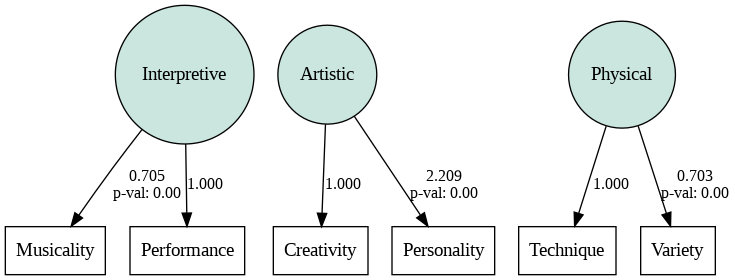